## Steps: 

1. Apply PCA to reduce feature dimensionality while maintaining variance. 
2. Determine the optimal number of principal components using the explained variance 
ratio. 
3. Visualize PCA results using a scatter plot and cumulative variance plot.

In [1]:
# Load the data
import pandas as pd

df_processed = pd.read_csv('../data/processed_heart_disease.csv')
df_processed.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,1,1,0.750380,-0.276443,1,2,0.017494,0,1.068965,3,-0.721976,2,0
1,1.378929,1,4,-0.659431,-0.353500,0,2,-0.899420,1,1.326662,2,1.411625,3,1
2,-1.941680,1,3,-0.095506,0.051047,0,0,1.633010,0,2.099753,3,-0.721976,1,0
3,-1.498933,0,2,-0.095506,-0.835103,0,2,0.978071,0,0.295874,1,-0.721976,1,0
4,0.161372,1,2,-0.659431,-0.218651,0,0,1.240047,0,-0.219520,1,-0.721976,1,0


In [2]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       261 non-null    float64
 1   sex       261 non-null    int64  
 2   cp        261 non-null    int64  
 3   trestbps  261 non-null    float64
 4   chol      261 non-null    float64
 5   fbs       261 non-null    int64  
 6   restecg   261 non-null    int64  
 7   thalach   261 non-null    float64
 8   exang     261 non-null    int64  
 9   oldpeak   261 non-null    float64
 10  slope     261 non-null    int64  
 11  ca        261 non-null    float64
 12  thal      261 non-null    int64  
 13  num       261 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 28.7 KB


## 1. Apply PCA to reduce feature dimensionality while maintaining variance. 

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_processed.dropna(inplace=True)

features = df_processed.drop(columns=['num'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.23118982 0.12162281 0.09714696 0.08656075 0.07899144 0.07015415
 0.06303641 0.06020992 0.05200126 0.04462419 0.03567349 0.03062268
 0.02816614]


## 2. Determine the optimal number of principal components using the explained variance ratio. 

In [4]:
optimal_components = (pca.explained_variance_ratio_ <= 0.035).argmax() + 1
print("Optimal number of components:", optimal_components)

Optimal number of components: 12


## 3. Visualize PCA results using a scatter plot and cumulative variance plot.

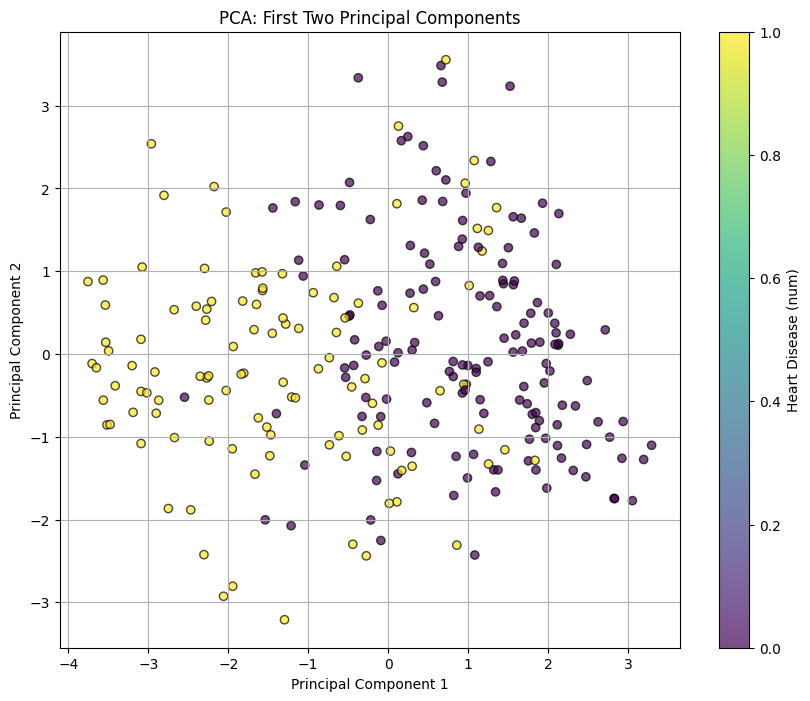

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_processed['num'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.colorbar(label='Heart Disease (num)')
plt.grid(True)
plt.show()

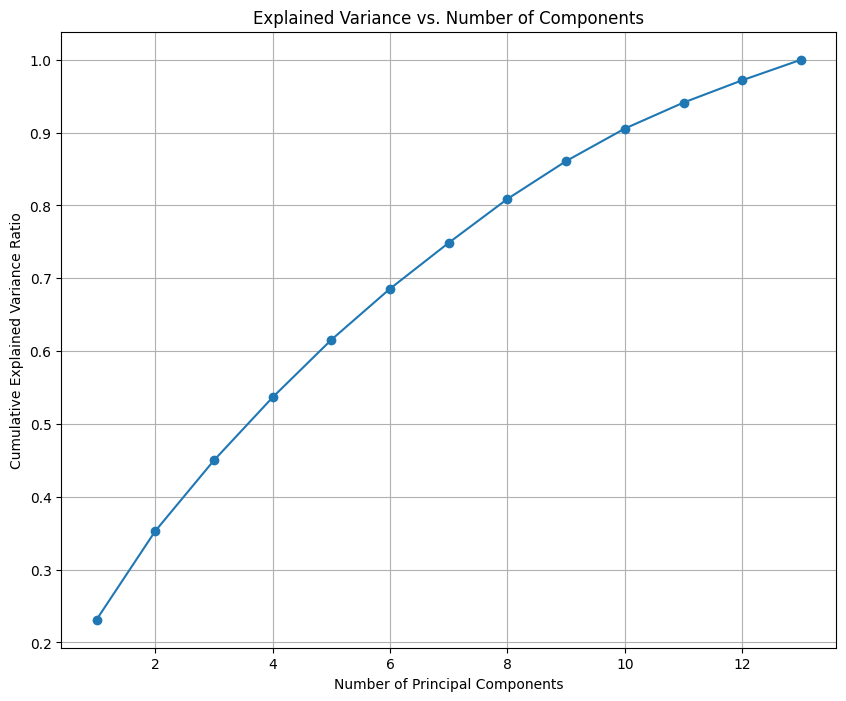

In [6]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()